In [1]:
import rasterio
from rasterio.plot import show
import os.path
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
DF = pd.read_csv("16-11-19.csv")

DF.head(10)

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDWI,NDVI,output
0,0.1523,0.2240,0.2486,0.2730,0.2911,0.2891,0.2872,0.3000,0.2936,0.2476,0.3742,0.3826,-0.093693,0.047120,0
1,0.1523,0.2066,0.2496,0.2710,0.2911,0.2891,0.2872,0.2902,0.2936,0.2476,0.3742,0.3826,-0.075213,0.034212,0
2,0.1523,0.2158,0.2508,0.2754,0.2953,0.2896,0.2899,0.2877,0.2921,0.2476,0.3750,0.3912,-0.068524,0.021843,0
3,0.1523,0.2168,0.2496,0.2680,0.2953,0.2896,0.2899,0.2809,0.2921,0.2476,0.3750,0.3912,-0.059001,0.023502,0
4,0.1523,0.2168,0.2496,0.2680,0.2963,0.2914,0.2990,0.2809,0.2989,0.2476,0.3854,0.3985,-0.059001,0.023502,0
5,0.1523,0.2264,0.2578,0.2822,0.2963,0.2914,0.2990,0.2940,0.2989,0.2476,0.3854,0.3985,-0.065603,0.020479,0
6,0.1506,0.1686,0.2010,0.2168,0.2878,0.2756,0.2871,0.2298,0.2852,0.2329,0.3542,0.3592,-0.066852,0.029109,0
7,0.1506,0.2138,0.2402,0.2570,0.2878,0.2756,0.2871,0.2736,0.2852,0.2329,0.3542,0.3592,-0.065006,0.031285,0
8,0.1506,0.2258,0.2608,0.2796,0.2878,0.2756,0.2871,0.3018,0.2852,0.2329,0.3542,0.3592,-0.072876,0.038184,0
9,0.1506,0.2174,0.2536,0.2724,0.2878,0.2756,0.2871,0.2888,0.2852,0.2329,0.3542,0.3592,-0.064897,0.029223,0


In [3]:
X = DF.drop('output',axis = 1)
Y = DF['output']

In [4]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
model.fit(X, Y)
pred1 = model.predict(X)
print(accuracy_score(pred1,Y))
print(confusion_matrix(Y, pred1))

1.0
[[6665    0]
 [   0 1840]]


In [5]:
img2 = rasterio.open("16-11-19.tif")
z2 = img2.read()

z2.shape

(14, 316, 226)

In [6]:
inp2 = []
for i in range(316):
    for j in range(226):
        for k in range(14):
            inp2.append(z2[k,i,j])
        #inp.append(ndvi[i,j])

print(len(inp2))

a = np.array(inp2)
inp2 = a.reshape(316*226,14)
inp2.shape

999824


(71416, 14)

In [7]:
import pandas as pd
DF2 = pd.DataFrame(inp2)
 
# save the dataframe as a csv file
DF2.to_csv("data2.csv")
DF2.columns =['B1', 'B2' ,'B3', 'B4','B5', 'B6','B7', 'B8','B8A', 'B9', 'B11', 'B12', 'NDWI','NDVI']

DF2.head(15)

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDWI,NDVI
0,0.0458,0.0590,0.0823,0.0877,0.0927,0.1499,0.1829,0.2263,0.2144,0.2215,0.1717,0.1045,-0.466623,0.441401
1,0.0458,0.0280,0.0359,0.0334,0.0927,0.1499,0.1829,0.1439,0.2144,0.2215,0.1717,0.1045,-0.600667,0.623237
2,0.0458,0.0255,0.0420,0.0346,0.0782,0.1864,0.2119,0.1976,0.2429,0.2215,0.1555,0.0860,-0.649416,0.701981
3,0.0458,0.0355,0.0577,0.0507,0.0782,0.1864,0.2119,0.2468,0.2429,0.2215,0.1555,0.0860,-0.621018,0.659160
4,0.0458,0.0302,0.0508,0.0388,0.0947,0.1578,0.1971,0.2612,0.2447,0.2215,0.1840,0.1005,-0.674359,0.741333
5,0.0458,0.0302,0.0508,0.0388,0.0947,0.1578,0.1971,0.2612,0.2447,0.2215,0.1840,0.1005,-0.674359,0.741333
6,0.0458,0.0213,0.0364,0.0266,0.0741,0.1857,0.2108,0.1925,0.2229,0.2215,0.1600,0.0841,-0.681957,0.757188
7,0.0458,0.0219,0.0337,0.0215,0.0741,0.1857,0.2108,0.2118,0.2229,0.2215,0.1600,0.0841,-0.725458,0.815688
8,0.0458,0.0227,0.0354,0.0218,0.0542,0.1449,0.1747,0.2258,0.1953,0.2215,0.1197,0.0546,-0.728943,0.823910
9,0.0458,0.0129,0.0237,0.0149,0.0542,0.1449,0.1747,0.1134,0.1953,0.2215,0.1197,0.0546,-0.654267,0.767732


In [8]:
pred_22 = model.predict(DF2)
pred_22

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

0 0
0 0


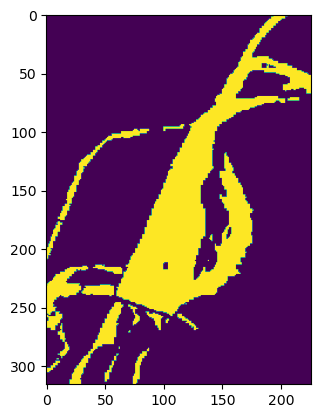

<AxesSubplot:>

In [9]:
a = np.array(pred_22)
pred_22 = a.reshape(316,226)

img = np.array(pred_22, dtype=np.uint8)
type(img[0,0])
img = img*255

print(img[0,40],pred_22[0,40])
print(img[25,0],pred_22[150,0])
#print(img[0,6],pred_22[0,6])

img3 = Image.fromarray(img)
img3.save('rf16-11-19.png')
show(img3)